# Algoritma Sorting (Pengurutan)
Algoritma pengurutan adalah metode yang digunakan untuk mengatur kumpulan data dalam urutan tertentu. Beberapa jenis algoritma pengurutan yang umum digunakan meliputi quick sort, heap sort, counting sort, radix sort, dan bucket sort. Quick sort bekerja dengan memilih elemen pivot dan mempartisi data menjadi dua bagian. Heap sort menggunakan struktur data heap untuk mengurutkan elemen. Counting sort cocok untuk mengurutkan data yang memiliki rentang nilai tertentu. Radix sort mengurutkan berdasarkan digit-digit angka dalam data. Bucket sort membagi data ke dalam beberapa "ember" dan mengurutkan masing-masing ember. Setiap algoritma memiliki kelebihan dan kelemahan serta kondisi penggunaan yang berbeda. Memahami berbagai jenis algoritma pengurutan dapat membantu pemrogram memilih algoritma yang paling efisien dan sesuai dengan situasi tertentu, baik dalam hal waktu eksekusi maupun penggunaan memori.

## 1. Quick Sort
Quick sort adalah algoritma pengurutan yang efisien dan sering digunakan untuk mengurutkan kumpulan data besar. Algoritma ini bekerja dengan memilih elemen pivot dari data dan mempartisi data menjadi dua bagian: elemen-elemen yang lebih kecil dari pivot dan elemen-elemen yang lebih besar dari pivot. Proses ini diulang pada kedua bagian data hingga seluruh data terurut. Langkah-langkah dalam Quick sort:
1. Pilih elemen pivot dari data.
2. Partisi data sehingga elemen-elemen yang lebih kecil dari pivot berada di satu sisi, dan elemen-elemen yang lebih besar berada di sisi lain.
3. Lakukan langkah 2 untuk kedua bagian data secara rekursif.
4. Gabungkan kembali bagian-bagian data yang telah terurut.


<img src="https://wat-images.s3.ap-south-1.amazonaws.com/images/course/ci6ldqnqthum/Quick_Sort_0.png" width="575px" />
Sumber Gambar: https://workat.tech

##### **Kelebihan Quick Sort**
Kelebihan Quick sort termasuk efisiensi dan kinerja yang baik pada data besar. Namun, efektivitasnya bisa dipengaruhi jika pivot dipilih dengan buruk, sehingga algoritma memerlukan pemilihan pivot yang cermat.

In [1]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    return quick_sort(left) + middle + quick_sort(right)

data = [3, 6, 8, 10, 1, 2, 1]
sorted_data = quick_sort(data)
print(sorted_data)  # Output: [1, 1, 2, 3, 6, 8, 10]


[1, 1, 2, 3, 6, 8, 10]


## 2. Circle Sort
Algoritma pengurutan lingkaran dapat divisualisasikan dengan menggambar lingkaran konsentris pada larik bilangan bulat. Elemen-elemen dari array yang terletak pada lingkaran yang sama secara diametris berlawanan satu sama lain dibandingkan dan jika ditemukan dalam urutan yang salah, mereka akan ditukar. Ini berlangsung secara rekursif di mana array dibagi menjadi sub-array di mana proses di atas diulang sampai kita mendapatkan pasangan elemen yang diurutkan yang bila disatukan membentuk array yang diurutkan. 

<img src="http://forth-4th.sourceforge.net/images/CircleSort.png" width="350px" />
Sumber Gambar: forth-4th.sourceforge.net

## 3. Counting Sort
Counting sort adalah algoritma pengurutan yang efisien untuk mengurutkan data dengan rentang nilai terbatas. Algoritma ini bekerja dengan menghitung berapa kali setiap elemen muncul dalam data, dan kemudian menghasilkan data yang terurut berdasarkan hasil perhitungan tersebut. Langkah-langkah dalam Counting sort:
1. Buat array frekuensi yang menghitung berapa kali setiap elemen muncul dalam data.
2. Buat array akumulatif yang menjumlahkan frekuensi untuk setiap elemen.
3. Buat array output yang akan menyimpan data yang terurut.
4. Iterasi dari belakang data asli, masukkan elemen ke dalam array output sesuai dengan posisinya dalam array akumulatif, lalu kurangi frekuensi elemen tersebut.
5. Output akan berisi data yang terurut.

In [ ]:
def counting_sort(arr):
    max_value = max(arr)
    min_value = min(arr)
    range_of_elements = max_value - min_value + 1
    
    counting_array = [0] * range_of_elements
    output_array = [0] * len(arr)
    
    for i in range(len(arr)):
        counting_array[arr[i] - min_value] += 1
        
    for i in range(1, len(counting_array)):
        counting_array[i] += counting_array[i - 1]
        
    for i in range(len(arr) - 1, -1, -1):
        output_array[counting_array[arr[i] - min_value] - 1] = arr[i]
        counting_array[arr[i] - min_value] -= 1
        
    return output_array

data = [4, 2, 2, 8, 3, 3, 1]
sorted_data = counting_sort(data)
print(sorted_data)  # Output: [1, 2, 2, 3, 3, 4, 8]


Counting sort sangat efisien jika nilai data memiliki rentang yang terbatas, tetapi dapat menjadi tidak praktis jika rentang nilai sangat besar.

## 4. Bucket Sort
Bucket atau bin sort adalah algoritma pengurutan yang cocok untuk mengurutkan data dengan rentang nilai yang terbatas dan mendistribusikan data dalam "ember" (bucket) berdasarkan nilai-nilai tertentu. Setiap bucket kemudian diurutkan secara terpisah, dan hasilnya digabungkan menjadi satu data yang terurut. Langkah-langkah dalam Bucket sort:
1. Membagi rentang nilai data menjadi beberapa bucket.
2. Memasukkan elemen-elemen data ke dalam bucket yang sesuai berdasarkan nilai.
3. Mengurutkan setiap bucket secara terpisah (misalnya menggunakan algoritma insertion sort).
4. Menggabungkan semua bucket yang telah diurutkan menjadi satu data yang terurut.

![bucketsort](https://files.codingninjas.in/article_images/bucket-sort-0-1635318303.jpg)

Bucket sort cocok untuk data dengan distribusi yang merata dalam rentang nilai tertentu, dan cocok untuk data dengan nilai desimal atau pecahan.

In [6]:
def bucket_sort(my_list: list) -> list:
    if len(my_list) == 0:
        return []
    min_value, max_value = min(my_list), max(my_list)
    bucket_count = int(max_value - min_value) + 1
    buckets: list[list] = [[] for _ in range(bucket_count)]

    for i in my_list:
        buckets[int(i - min_value)].append(i)

    return [v for bucket in buckets for v in sorted(bucket)]

print(bucket_sort([4, 5, 3, 2, 1]))
print(bucket_sort([0, 1, -10, 15, 2, -2]))


[1, 2, 3, 4, 5]
[-10, -2, 0, 1, 2, 15]


## 5. Heap Sort
Heap sort adalah algoritma pengurutan yang menggunakan struktur data heap untuk mengurutkan kumpulan data. Heap adalah struktur data pohon biner yang memiliki properti khusus: setiap node memiliki nilai yang lebih kecil atau lebih besar daripada anak-anaknya, tergantung pada jenis heap (max heap atau min heap). Langkah-langkah dalam Heap sort:
1. Bangun heap dari data yang akan diurutkan.
2. Pindahkan elemen teratas heap (akar) ke akhir data yang terurut.
3. Perbaiki properti heap setelah memindahkan elemen teratas.
4. Ulangi langkah 2-3 hingga seluruh data terurut.

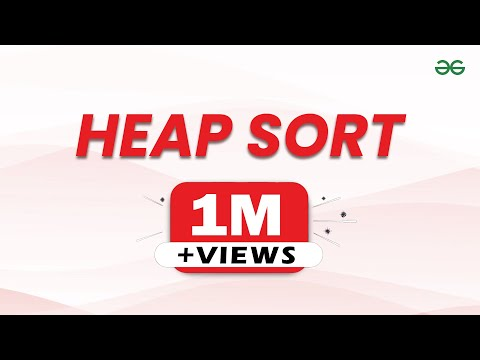

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('MtQL_ll5KhQ')

Kelebihan Heap sort termasuk kecepatan yang stabil pada berbagai ukuran data dan kecocokan terbaiknya pada data yang sudah ada dalam struktur heap. Namun, implementasinya dapat memerlukan lebih banyak memori dibandingkan dengan beberapa algoritma pengurutan lainnya. Contoh Heap sort dalam Python:

In [ ]:
def heapify(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2
    if left < n and arr[left] > arr[largest]:
        largest = left
        
    if right < n and arr[right] > arr[largest]:
        largest = right
        
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)
    
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
        
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

data = [3, 6, 8, 10, 1, 2, 1]
heap_sort(data)
print(data)  # Output: [1, 1, 2, 3, 6, 8, 10]